<a href="https://colab.research.google.com/github/abs790502/HW/blob/main/Australian_Vehicle_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 掛載GOOGLE DRIVE

In [1]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/python/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/python/'

Mounted at /content/drive


## Import API

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
lb = LabelEncoder()
mx = MinMaxScaler()
onehot_encoder = OneHotEncoder()

## 讀取GOOGLE DRIVE 中的csv檔

In [3]:
df = pd.read_csv("/content/drive/My Drive/python/Australian Vehicle Prices/Australian Vehicle Prices.csv")
print(df.head())

           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16

##資料清洗

In [4]:
df.info()   #最多有16733 比樣本
df.isnull().sum() #可以看到每行都有缺失值，其中Doors,Seats,Location 缺少最多

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

####分析

In [24]:
# df.dropna(inplace=True) #移除缺失值
# df.info()
#與原始資料相比少了12.8% ，此次分析不需要考慮Doors,Seats,Location 故先把這幾行的空格填入虛擬(virtual)

In [ ]:
df

Brand    Year    Model               Car/Suv  \
0          Ssangyong  2022.0   Rexton  Sutherland Isuzu Ute   
1                 MG  2022.0      MG3             Hatchback   
2                BMW  2022.0     430I                 Coupe   
3      Mercedes-Benz  2011.0     E500                 Coupe   
4            Renault  2022.0   Arkana                   SUV   
...              ...     ...      ...                   ...   
16729         Toyota  2014.0  Alphard              SYC Cars   
16730  Mercedes-Benz  2012.0  S-Class        USED Dealer ad   
16731         Suzuki  2022.0   Vitara   Bremer Suzuki - New   
16732  Mercedes-Benz  2016.0   GLC250                   SUV   
16733  Mercedes-Benz  2021.0     C200                 Sedan   

                                           Title UsedOrNew Transmission  \
0           2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1      2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                          2022 BMW 430I M Sport      USED    Automatic   
3               2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                     2022 Renault Arkana Intens      USED    Automatic   
...                                          ...       ...          ...   
16729                        2014 Toyota Alphard      USED    Automatic   
16730     2012 Mercedes-Benz S-Class CDI BlueTEC      USED    Automatic   
16731                    2022 Suzuki Vitara 1.6L      DEMO    Automatic   
16732                  2016 Mercedes-Benz GLC250      USED    Automatic   
16733                    2021 Mercedes-Benz C200      USED    Automatic   

             Engine DriveType  FuelType FuelConsumption Kilometres  \
0      4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595   
1      4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16   
2        4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   
3      8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517   
4      4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   
...             ...       ...       ...             ...        ...   
16729             -     Front  Unleaded               -      66000   
16730             -      Rear    Diesel               -     117432   
16731  4 cyl, 1.6 L     Front  Unleaded  6.2 L / 100 km       5165   
16732    4 cyl, 2 L       AWD   Premium  7.2 L / 100 km      85525   
16733    4 cyl, 2 L      Rear  Unleaded    7 L / 100 km      31852   

        ColourExtInt             Location CylindersinEngine    BodyType  \
0      White / Black       Caringbah, NSW             4 cyl         SUV   
1      Black / Black       Brookvale, NSW             4 cyl   Hatchback   
2       Grey / White        Sylvania, NSW             4 cyl       Coupe   
3      White / Brown    Mount Druitt, NSW             8 cyl       Coupe   
4       Grey / Black     Castle Hill, NSW             4 cyl         SUV   
...              ...                  ...               ...         ...   
16729       Grey / -         Rocklea, QLD                 -  Commercial   
16730     Silver / -  Port Melbourne, VIC                 -         NaN   
16731     Yellow / -         Dinmore, QLD             4 cyl         SUV   
16732   Grey / Black          Albion, QLD             4 cyl         SUV   
16733       Gold / -          Yatala, QLD             4 cyl       Sedan   

          Doors     Seats   Price  
0       4 Doors   7 Seats   51990  
1       5 Doors   5 Seats   19990  
2       2 Doors   4 Seats  108988  
3       2 Doors   4 Seats   32990  
4       4 Doors   5 Seats   34990  
...         ...       ...     ...  
16729   7 Seats       NaN   29500  
16730       NaN       NaN   39888  
16731   4 Doors   5 Seats   35280  
16732   4 Doors   5 Seats   41888  
16733   4 Doors   5 Seats   65888  

[16734 rows x 19 columns]

####取代

In [5]:
df['Location'].fillna('virtual', inplace=True)
df['Doors'].fillna('virtual', inplace=True)
df['Seats'].fillna('virtual', inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #price 欄位中有'POA' 故先把無效資訊轉成空值
df['Year'] = df['Year'].fillna(0).astype(int)
df.dropna(inplace=True)
df.info()
# df.info()   還有16389 比樣本 比原始資料少2% ，故將以此整理後資料進行數據分析

<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16389 non-null  object 
 1   Year               16389 non-null  int64  
 2   Model              16389 non-null  object 
 3   Car/Suv            16389 non-null  object 
 4   Title              16389 non-null  object 
 5   UsedOrNew          16389 non-null  object 
 6   Transmission       16389 non-null  object 
 7   Engine             16389 non-null  object 
 8   DriveType          16389 non-null  object 
 9   FuelType           16389 non-null  object 
 10  FuelConsumption    16389 non-null  object 
 11  Kilometres         16389 non-null  object 
 12  ColourExtInt       16389 non-null  object 
 13  Location           16389 non-null  object 
 14  CylindersinEngine  16389 non-null  object 
 15  BodyType           16389 non-null  object 
 16  Doors              16389 no

####移除

In [ ]:
df.drop(columns=['Doors'], inplace=True)
df.drop(columns=['Seats'], inplace=True)
df.drop(columns=['Location'], inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #price 欄位中有'POA' 故先把無效資訊轉成空值
df['Year'] = df['Year'].fillna(0).astype(int)
df.dropna(inplace=True)
df.info()
# df.info()   還有16389 比樣本 比原始資料少2% ，故將以此整理後資料進行數據分析

<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 16733
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16389 non-null  object 
 1   Year               16389 non-null  int64  
 2   Model              16389 non-null  object 
 3   Car/Suv            16389 non-null  object 
 4   Title              16389 non-null  object 
 5   UsedOrNew          16389 non-null  object 
 6   Transmission       16389 non-null  object 
 7   Engine             16389 non-null  object 
 8   DriveType          16389 non-null  object 
 9   FuelType           16389 non-null  object 
 10  FuelConsumption    16389 non-null  object 
 11  Kilometres         16389 non-null  object 
 12  ColourExtInt       16389 non-null  object 
 13  CylindersinEngine  16389 non-null  object 
 14  BodyType           16389 non-null  object 
 15  Price              16389 non-null  float64
dtypes: float64(1), int64(1), ob

#heatmap

####LabelEncoder



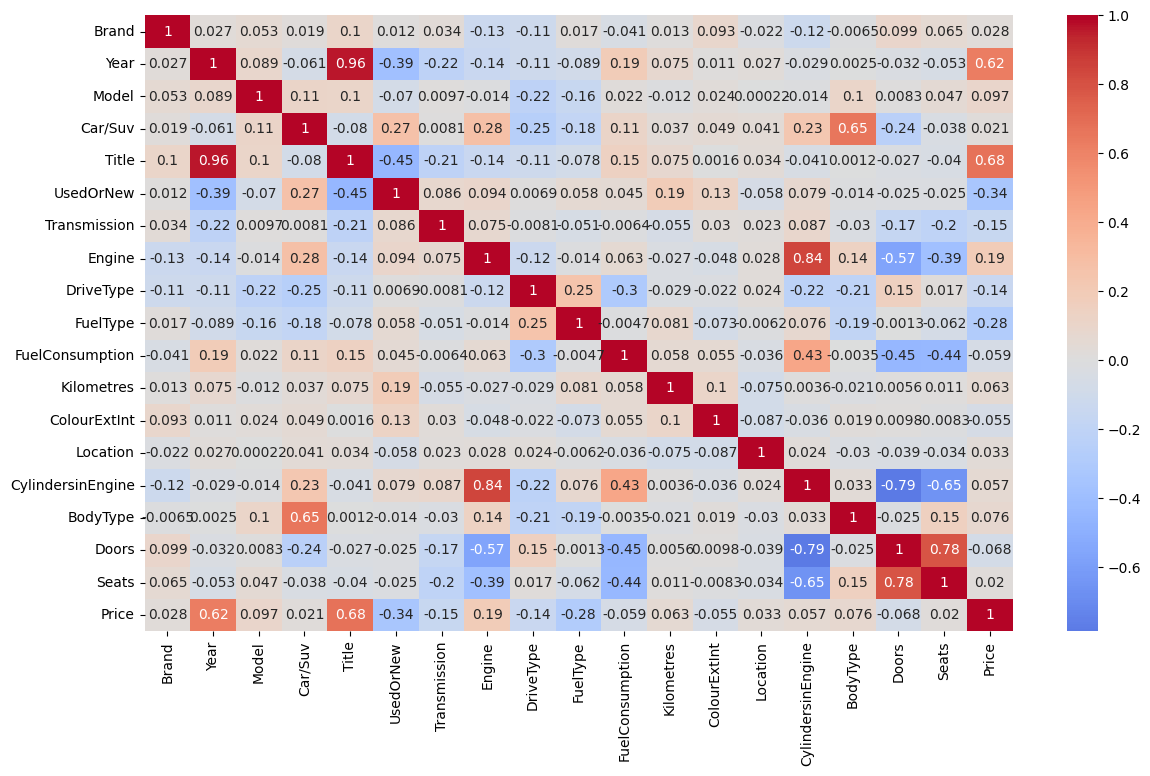

In [6]:
df_encoded = df.apply(lb.fit_transform)
corr_matrix=df_encoded.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0,cmap = 'coolwarm', annot=True)
plt.show()

####CylindersinEngine & Title Overfit 故拿掉


<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 16733
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Brand            16389 non-null  int64
 1   Year             16389 non-null  int64
 2   Model            16389 non-null  int64
 3   Car/Suv          16389 non-null  int64
 4   UsedOrNew        16389 non-null  int64
 5   Transmission     16389 non-null  int64
 6   Engine           16389 non-null  int64
 7   DriveType        16389 non-null  int64
 8   FuelType         16389 non-null  int64
 9   FuelConsumption  16389 non-null  int64
 10  Kilometres       16389 non-null  int64
 11  ColourExtInt     16389 non-null  int64
 12  Location         16389 non-null  int64
 13  BodyType         16389 non-null  int64
 14  Doors            16389 non-null  int64
 15  Seats            16389 non-null  int64
 16  Price            16389 non-null  int64
dtypes: int64(17)
memory usage: 2.3 MB


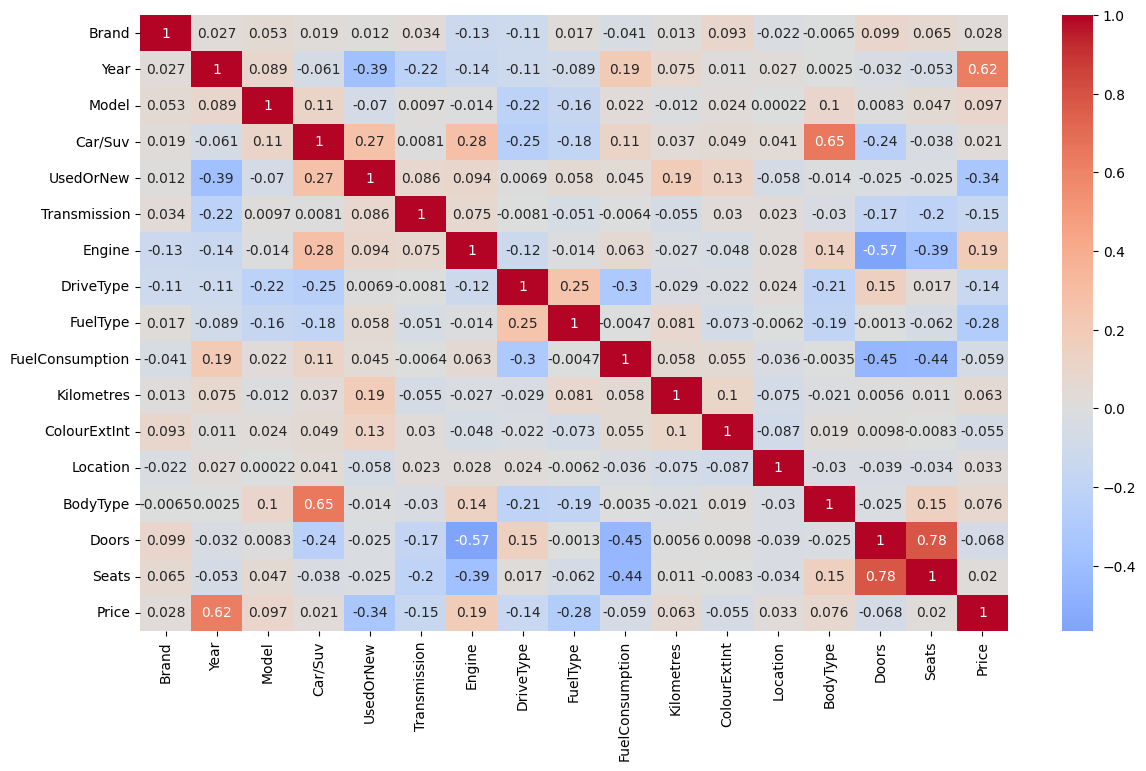

In [7]:
df_encoded.drop(columns=['CylindersinEngine'], inplace=True)
df_encoded.drop(columns=['Title'], inplace=True)
df_encoded.dropna(inplace=True)
df_encoded.info()
df_encoded.head()

corr_matrix=df_encoded.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0,cmap = 'coolwarm', annot=True)
plt.show()

####進行標準化

In [8]:
df_encoded['Price'] = pd.to_numeric(df_encoded['Price'], errors='coerce', downcast='integer')
df_encoded['Year'] = pd.to_numeric(df_encoded['Year'], errors='coerce', downcast='integer')
df_encoded['Kilometres'] = pd.to_numeric(df_encoded['Kilometres'], errors='coerce', downcast='integer')
df_encoded['Price'] = mx.fit_transform(df_encoded[['Price']])
df_encoded['Year'] = mx.fit_transform(df_encoded[['Year']])
df_encoded['Kilometres'] = mx.fit_transform(df_encoded[['Kilometres']])
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 16733
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            16389 non-null  int64  
 1   Year             16389 non-null  float64
 2   Model            16389 non-null  int64  
 3   Car/Suv          16389 non-null  int64  
 4   UsedOrNew        16389 non-null  int64  
 5   Transmission     16389 non-null  int64  
 6   Engine           16389 non-null  int64  
 7   DriveType        16389 non-null  int64  
 8   FuelType         16389 non-null  int64  
 9   FuelConsumption  16389 non-null  int64  
 10  Kilometres       16389 non-null  float64
 11  ColourExtInt     16389 non-null  int64  
 12  Location         16389 non-null  int64  
 13  BodyType         16389 non-null  int64  
 14  Doors            16389 non-null  int64  
 15  Seats            16389 non-null  int64  
 16  Price            16389 non-null  float64
dtypes: float64(3), in

Brand   Year  Model  Car/Suv  UsedOrNew  Transmission  Engine  DriveType  \
0     64  0.975    610      505          0             1      32          1   
1     43  0.975    482      225          2             1      25          2   
2      4  0.975     60      159          2             1      30          4   
3     48  0.700    265      159          2             1      96          4   
4     58  0.975    123      465          2             1      23          2   

   FuelType  FuelConsumption  Kilometres  ColourExtInt  Location  BodyType  \
0         1              144    0.723236           648       113         6   
1         7              124    0.262438            61        80         3   
2         7              123    0.906771           409       525         2   
3         7               15    0.171490           691       374         2   
4         8              117    0.018959           314       119         6   

   Doors  Seats     Price  
0      5     10  0.642933  
1      7      8  0.182400  
2      1      7  0.904800  
3      1      7  0.389867  
4      5      8  0.422667

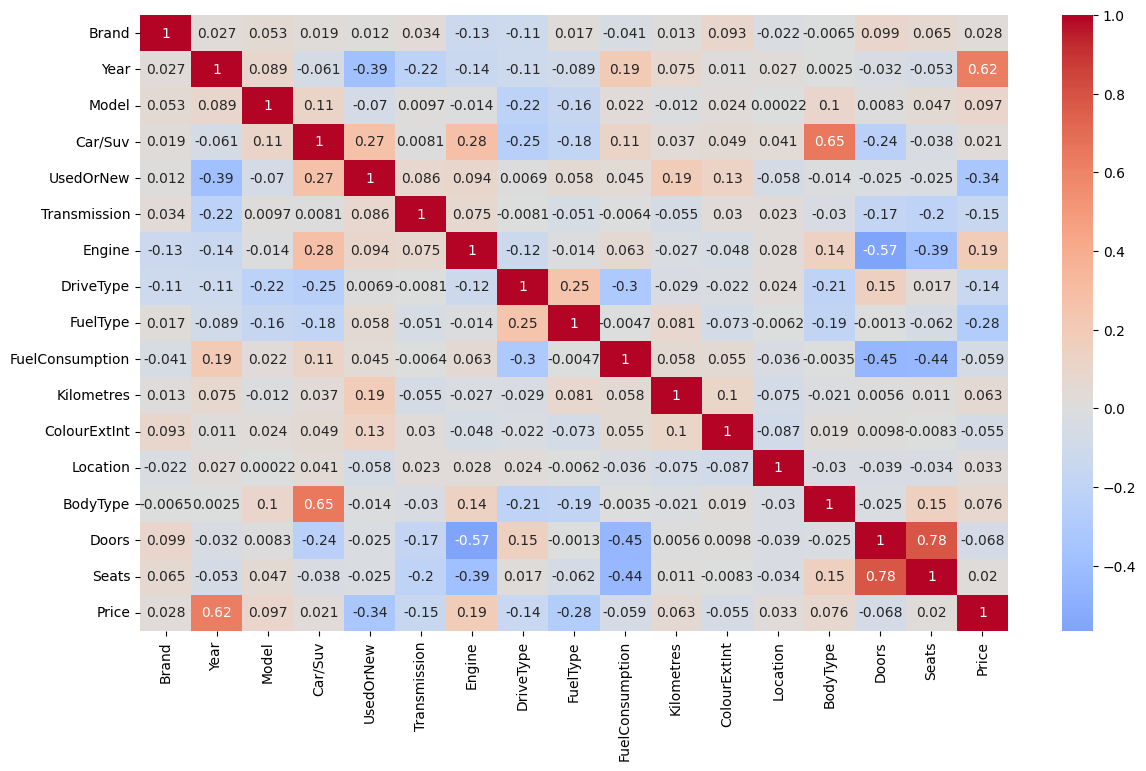

In [9]:
corr_matrix=df_encoded.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0,cmap = 'coolwarm', annot=True)
plt.show()

####OneHotEncoder 資料量過大無法編碼



In [ ]:
# df_onehot = df[['Price', 'Year', 'Title']]
# df_onehot = onehot_encoder.fit_transform(df_encoded)
# df_onehot = pd.DataFrame(df_onehot.toarray())
# corr_matrix=df_onehot.corr()
# plt.figure(1, figsize=(14,8))
# sns.heatmap(corr_matrix,center=0,cmap = 'coolwarm', annot=True)
# plt.show()

####get_dummies資料量過大無法編碼

In [ ]:
# df_gd = df[['Price', 'Year', 'Title']]
# df_gd = onehot_encoder.fit_transform(df_encoded)
# df_gd = pd.DataFrame(df_gd.toarray())
# corr_matrix=df_gd.corr()
# plt.figure(1, figsize=(14,8))
# sns.heatmap(corr_matrix,center=0,cmap = 'coolwarm', annot=True)
# plt.show()

Year     Price  Brand_Abarth  Brand_Alfa  Brand_Aston  Brand_Audi  \
0      2022   51990.0         False       False        False       False   
1      2022   19990.0         False       False        False       False   
2      2022  108988.0         False       False        False       False   
3      2011   32990.0         False       False        False       False   
4      2022   34990.0         False       False        False       False   
...     ...       ...           ...         ...          ...         ...   
16728  2021   36770.0         False       False        False       False   
16729  2014   29500.0         False       False        False       False   
16731  2022   35280.0         False       False        False       False   
16732  2016   41888.0         False       False        False       False   
16733  2021   65888.0         False       False        False       False   

       Brand_BMW  Brand_BYD  Brand_Bentley  Brand_Caterham  ...  \
0          False      False          False           False  ...   
1          False      False          False           False  ...   
2           True      False          False           False  ...   
3          False      False          False           False  ...   
4          False      False          False           False  ...   
...          ...        ...            ...             ...  ...   
16728      False      False          False           False  ...   
16729      False      False          False           False  ...   
16731      False      False          False           False  ...   
16732      False      False          False           False  ...   
16733      False      False          False           False  ...   

       BodyType_Commercial  BodyType_Convertible  BodyType_Coupe  \
0                    False                 False           False   
1                    False                 False           False   
2                    False                 False            True   
3                    False                 False            True   
4                    False                 False           False   
...                    ...                   ...             ...   
16728                False                 False           False   
16729                 True                 False           False   
16731                False                 False           False   
16732                False                 False           False   
16733                False                 False           False   

       BodyType_Hatchback  BodyType_Other  BodyType_People Mover  \
0                   False           False                  False   
1                    True           False                  False   
2                   False           False                  False   
3                   False           False                  False   
4                   False           False                  False   
...                   ...             ...                    ...   
16728               False           False                  False   
16729               False           False                  False   
16731               False           False                  False   
16732               False           False                  False   
16733               False           False                  False   

       BodyType_SUV  BodyType_Sedan  BodyType_Ute / Tray  BodyType_Wagon  
0              True           False                False           False  
1             False           False                False           False  
2             False           False                False           False  
3             False           False                False           False  
4              True           False                False           False  
...             ...             ...                  ...             ...  
16728          True           False                False           False  
16729         False           False                Fals

#訓練與測試

In [10]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Mean Squared Error:', mse_linear)
print("R² Score:", r2_linear)


Mean Squared Error: 0.02526971683882384
R² Score: 0.5941706111061448


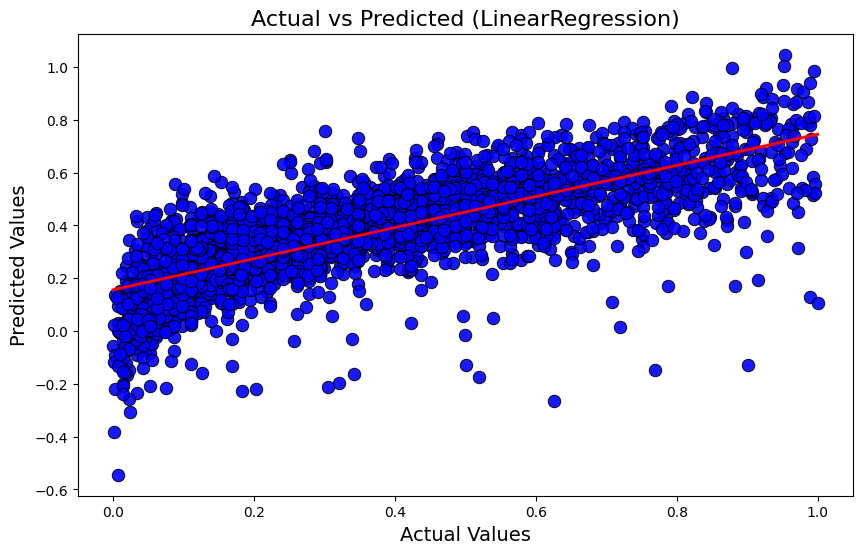

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_linear, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (LinearRegression)', fontsize=16)

plt.show()

####xgboost

In [13]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred_xgboost = model.predict(X_test)

mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print('Mean Squared Error:', mse_xgboost)
print("R² Score:", r2_xgboost)


Mean Squared Error: 0.005112560330481303
R² Score: 0.9178927390506223


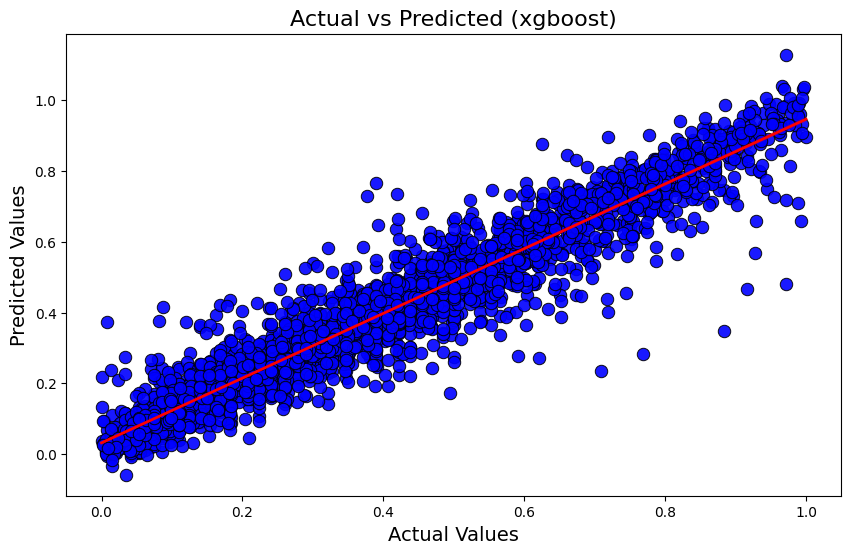

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgboost, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_xgboost, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (xgboost)', fontsize=16)

plt.show()

####lightbgm

In [15]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
y_pred_lightgbm = model.predict(X_test)

mse_lightgbm = mean_squared_error(y_test, y_pred_lightgbm)
r2_lightgbm = r2_score(y_test, y_pred_lightgbm)

print('Mean Squared Error:', mse_lightgbm)
print("R² Score:", r2_lightgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 13111, number of used features: 16
[LightGBM] [Info] Start training from score 0.378626
Mean Squared Error: 0.005941195749110501
R² Score: 0.9045849284525458


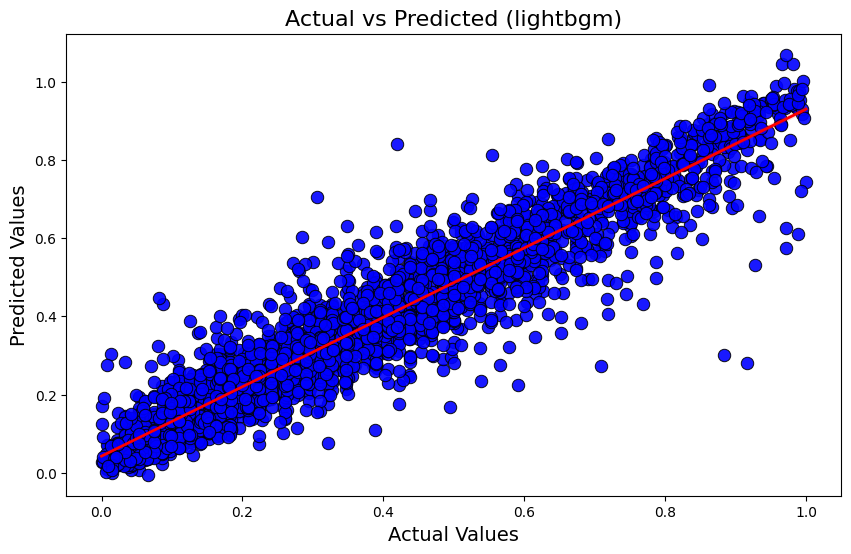

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lightgbm, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_lightgbm, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (lightbgm)', fontsize=16)

plt.show()

####DecisionTreeRegressor

In [17]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print('Mean Squared Error:', mse_tree)
print("R² Score:", r2_tree)

Mean Squared Error: 0.01336033019589482
R² Score: 0.7854342938069709


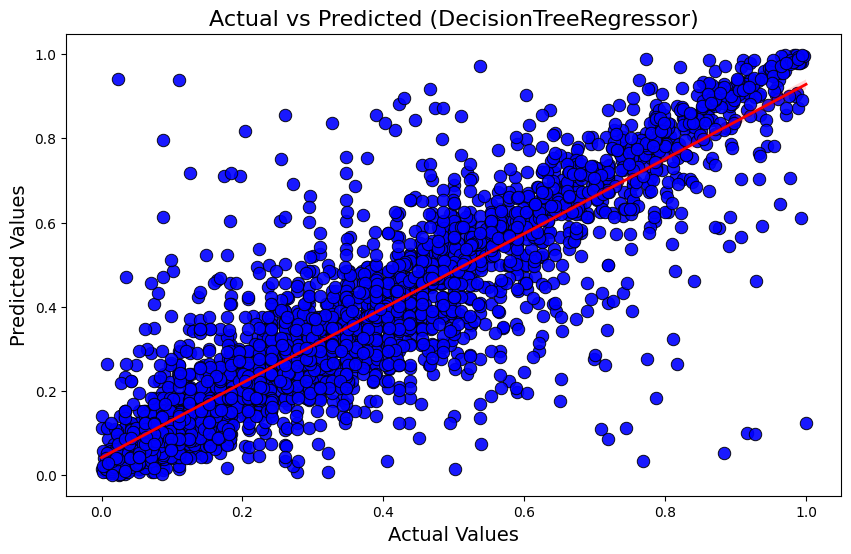

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_tree, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (DecisionTreeRegressor)', fontsize=16)

plt.show()

####RandomForestRegressor

In [19]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_forest = model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print('Mean Squared Error:', mse_forest)
print("R² Score:", r2_forest)

Mean Squared Error: 0.006644611446973173
R² Score: 0.8932881353534096


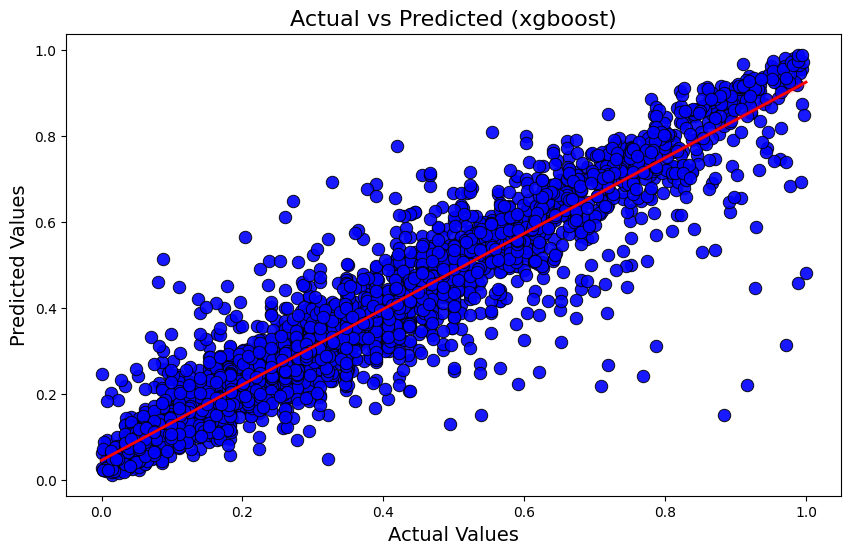

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_forest, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_forest, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (RandomForestRegressor)', fontsize=16)

plt.show()

####五張圖比較

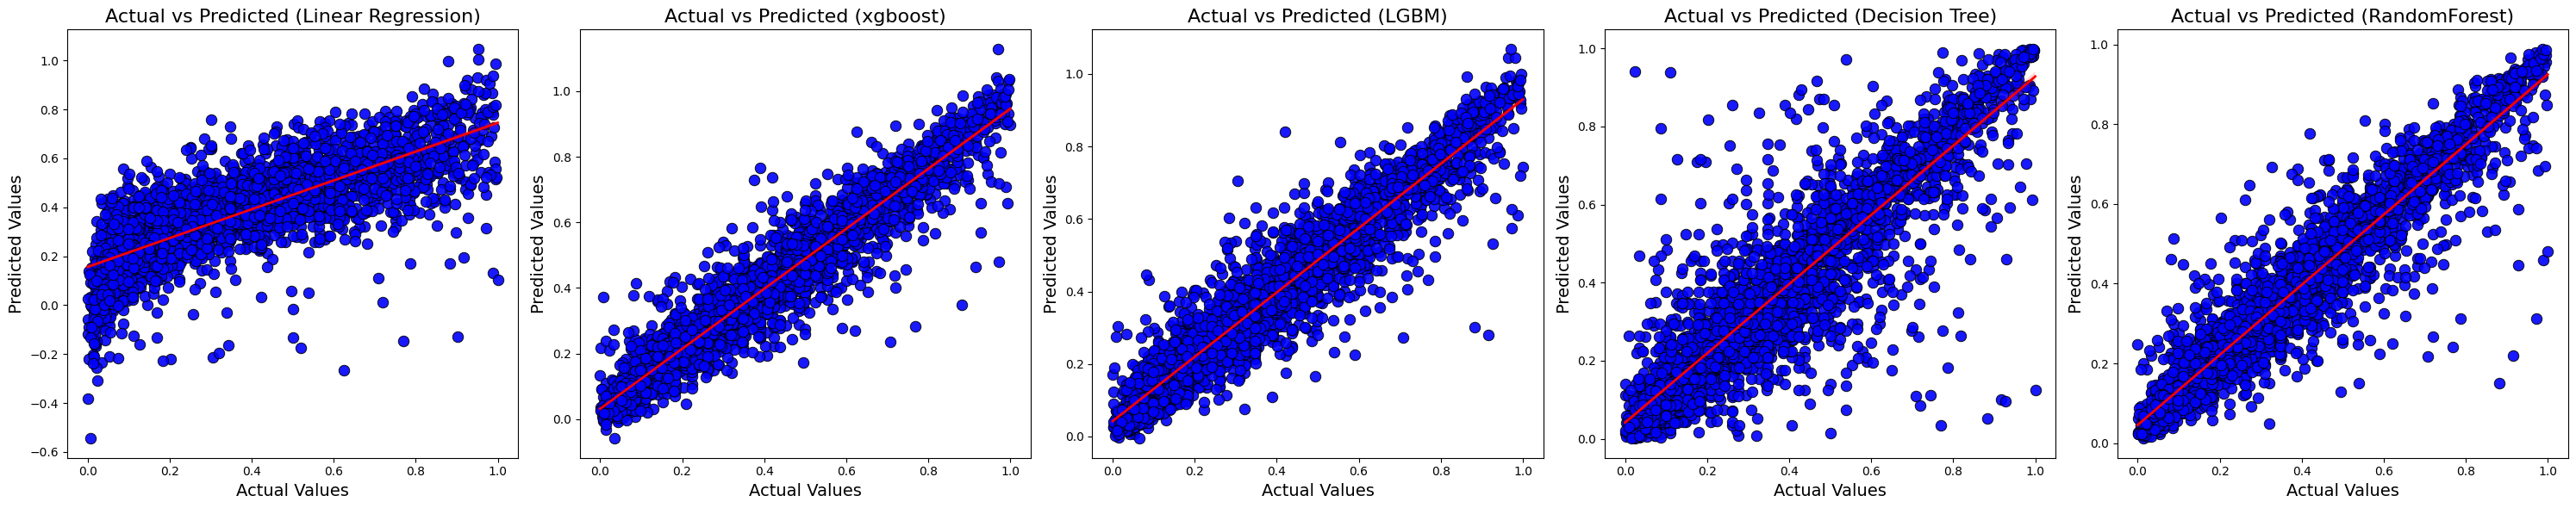

In [21]:
plt.figure(figsize=(30, 6))

# 第一個子圖：Linear Regression
plt.subplot(1, 5, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_linear, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (Linear Regression)', fontsize=16)

# 第二個子圖：xgboost
plt.subplot(1, 5, 2)
sns.scatterplot(x=y_test, y=y_pred_xgboost, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_xgboost, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (xgboost)', fontsize=16)

# 第三個子圖：LGBM
plt.subplot(1, 5, 3)
sns.scatterplot(x=y_test, y=y_pred_lightgbm, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_lightgbm, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (LGBM)', fontsize=16)

# 第四個子圖：決策樹
plt.subplot(1, 5, 4)
sns.scatterplot(x=y_test, y=y_pred_tree, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_tree, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (Decision Tree)', fontsize=16)

# 第五個子圖：隨機森林
plt.subplot(1, 5, 5)
sns.scatterplot(x=y_test, y=y_pred_forest, color='b', alpha=0.9, edgecolor='k', s=80)
sns.regplot(x=y_test, y=y_pred_forest, scatter=False, color='r', line_kws={"color": "red", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title('Actual vs Predicted (RandomForest)', fontsize=16)


plt.tight_layout()
plt.show()

<ipython-input-22-2d30a261ce84>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=df_accuracy, palette='viridis')


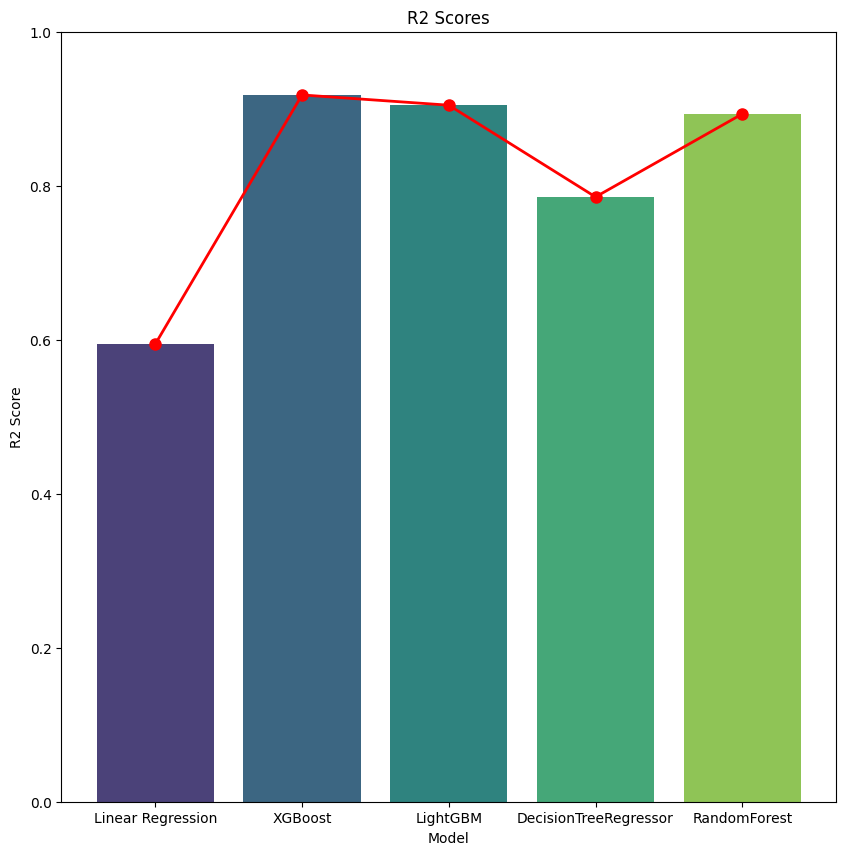

In [22]:
model_names = ['Linear Regression', 'XGBoost', 'LightGBM','DecisionTreeRegressor', 'RandomForest']
r2_scores = [r2_linear, r2_xgboost, r2_lightgbm, r2_tree, r2_forest]
df_accuracy = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores})
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='R2 Score', data=df_accuracy, palette='viridis')
plt.title('R2 Scores')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.plot(df_accuracy['Model'], df_accuracy['R2 Score'], marker='o', color='red', linewidth=2, linestyle='-', markersize=8)
plt.ylim(0, 1)
plt.show()

#### Neural Network

#####隱藏層2.神經元64.次數50

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
# 模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# 訓練模型
train_history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# 在測試集上進行預測
y_pred_neural = model.predict(X_test)

# 評估模型性能
r2_neural = r2_score(y_test, y_pred_neural)
print('R² Score:', r2_neural)

Epoch 1/50
328/328 [==============================] - 2s 3ms/step - loss: 39.0028 - mean_squared_error: 39.0028 - val_loss: 8.9882 - val_mean_squared_error: 8.9882
Epoch 2/50
328/328 [==============================] - 1s 2ms/step - loss: 4.9495 - mean_squared_error: 4.9495 - val_loss: 3.8871 - val_mean_squared_error: 3.8871
Epoch 3/50
328/328 [==============================] - 1s 2ms/step - loss: 2.8233 - mean_squared_error: 2.8233 - val_loss: 2.4378 - val_mean_squared_error: 2.4378
Epoch 4/50
328/328 [==============================] - 1s 2ms/step - loss: 2.3419 - mean_squared_error: 2.3419 - val_loss: 1.9099 - val_mean_squared_error: 1.9099
Epoch 5/50
328/328 [==============================] - 1s 2ms/step - loss: 1.7757 - mean_squared_error: 1.7757 - val_loss: 1.0995 - val_mean_squared_error: 1.0995
Epoch 6/50
328/328 [==============================] - 2s 5ms/step - loss: 1.3750 - mean_squared_error: 1.3750 - val_loss: 1.3887 - val_mean_squared_error: 1.3887
Epoch 7/50
328/328 [======

######優化過程

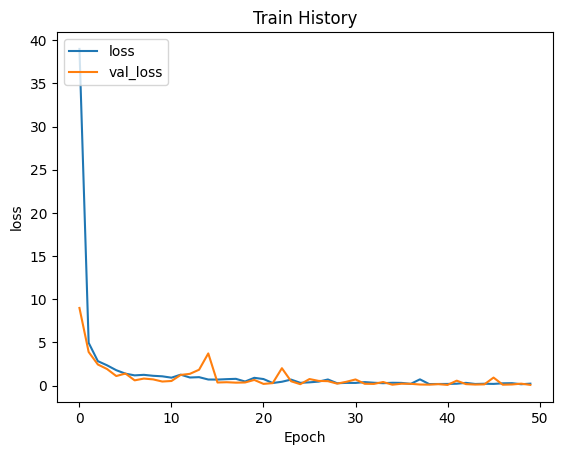

In [39]:
#看優化的過程
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#####隱藏層2.神經元64.次數250

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
# 模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# 訓練模型
train_history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)
# 在測試集上進行預測
y_pred_neural = model.predict(X_test)

# 評估模型性能
r2_neural = r2_score(y_test, y_pred_neural)
print('R² Score:', r2_neural)

Epoch 1/250
328/328 [==============================] - 2s 3ms/step - loss: 86.8553 - mean_squared_error: 86.8553 - val_loss: 5.0506 - val_mean_squared_error: 5.0506
Epoch 2/250
328/328 [==============================] - 1s 2ms/step - loss: 3.3557 - mean_squared_error: 3.3557 - val_loss: 2.2946 - val_mean_squared_error: 2.2946
Epoch 3/250
328/328 [==============================] - 1s 2ms/step - loss: 1.9219 - mean_squared_error: 1.9219 - val_loss: 1.7771 - val_mean_squared_error: 1.7771
Epoch 4/250
328/328 [==============================] - 1s 3ms/step - loss: 1.4877 - mean_squared_error: 1.4877 - val_loss: 1.2194 - val_mean_squared_error: 1.2194
Epoch 5/250
328/328 [==============================] - 1s 2ms/step - loss: 1.1339 - mean_squared_error: 1.1339 - val_loss: 1.2052 - val_mean_squared_error: 1.2052
Epoch 6/250
328/328 [==============================] - 1s 2ms/step - loss: 0.9900 - mean_squared_error: 0.9900 - val_loss: 0.8219 - val_mean_squared_error: 0.8219
Epoch 7/250
328/328 

######優化過程

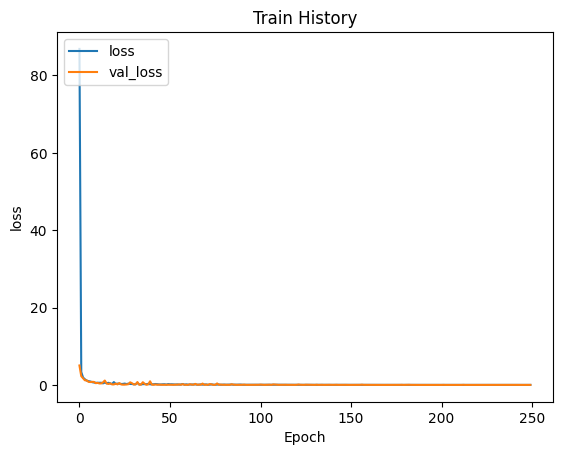

In [41]:
#看優化的過程
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#####隱藏層6.神經元64.次數50

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
# 模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# 訓練模型
train_history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# 在測試集上進行預測
y_pred_neural = model.predict(X_test)

# 評估模型性能
r2_neural = r2_score(y_test, y_pred_neural)
print('R² Score:', r2_neural)

Epoch 1/50
328/328 [==============================] - 2s 4ms/step - loss: 3.4271 - mean_squared_error: 3.4271 - val_loss: 0.1838 - val_mean_squared_error: 0.1838
Epoch 2/50
328/328 [==============================] - 1s 3ms/step - loss: 0.1595 - mean_squared_error: 0.1595 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 3/50
328/328 [==============================] - 1s 3ms/step - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 4/50
328/328 [==============================] - 2s 6ms/step - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0751 - val_mean_squared_error: 0.0751
Epoch 5/50
328/328 [==============================] - 3s 8ms/step - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0655 - val_mean_squared_error: 0.0655
Epoch 6/50
328/328 [==============================] - 4s 11ms/step - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0622 - val_mean_squared_error: 0.0622
Epoch 7/50
328/328 [=======

######優化過程

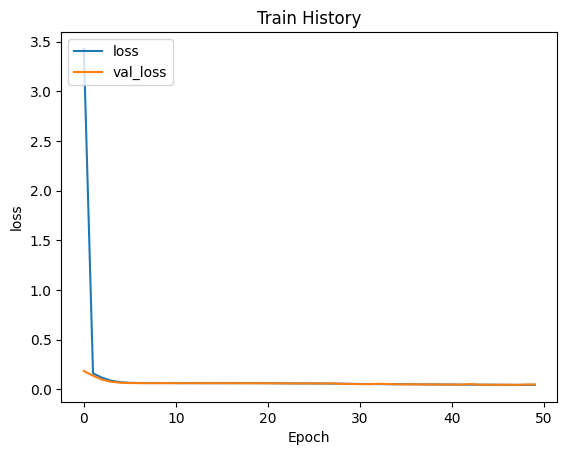

In [43]:
#看優化的過程
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#####隱藏層6.神經元64.次數250

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
# 模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# 訓練模型
train_history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)
# 在測試集上進行預測
y_pred_neural = model.predict(X_test)

# 評估模型性能
r2_neural = r2_score(y_test, y_pred_neural)
print('R² Score:', r2_neural)

Epoch 1/250
328/328 [==============================] - 2s 3ms/step - loss: 0.2758 - mean_squared_error: 0.2758 - val_loss: 0.0945 - val_mean_squared_error: 0.0945
Epoch 2/250
328/328 [==============================] - 1s 3ms/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0638 - val_mean_squared_error: 0.0638
Epoch 3/250
328/328 [==============================] - 1s 3ms/step - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 4/250
328/328 [==============================] - 2s 5ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 5/250
328/328 [==============================] - 2s 5ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 6/250
328/328 [==============================] - 1s 4ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 7/250
328/328 [=

######優化過程

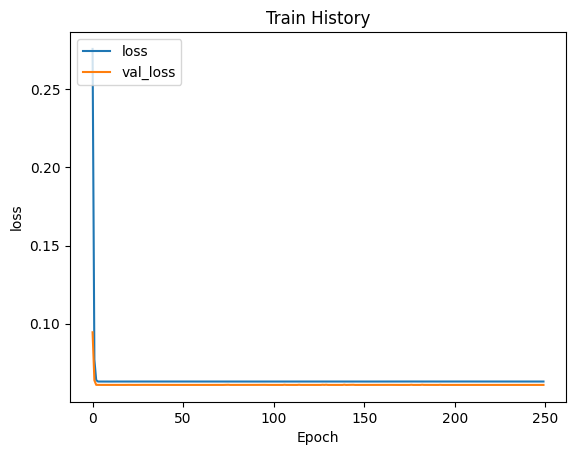

In [36]:
#看優化的過程
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#####隱藏層2.神經元256.次數250

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
# 模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# 訓練模型
train_history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)
# 在測試集上進行預測
y_pred_neural = model.predict(X_test)

# 評估模型性能
r2_neural = r2_score(y_test, y_pred_neural)
print('R² Score:', r2_neural)

Epoch 1/250
328/328 [==============================] - 2s 3ms/step - loss: 23.7782 - mean_squared_error: 23.7782 - val_loss: 1.0358 - val_mean_squared_error: 1.0358
Epoch 2/250
328/328 [==============================] - 1s 3ms/step - loss: 0.9152 - mean_squared_error: 0.9152 - val_loss: 1.7932 - val_mean_squared_error: 1.7932
Epoch 3/250
328/328 [==============================] - 1s 3ms/step - loss: 0.8856 - mean_squared_error: 0.8856 - val_loss: 1.9504 - val_mean_squared_error: 1.9504
Epoch 4/250
328/328 [==============================] - 1s 3ms/step - loss: 1.8010 - mean_squared_error: 1.8010 - val_loss: 2.8107 - val_mean_squared_error: 2.8107
Epoch 5/250
328/328 [==============================] - 1s 4ms/step - loss: 1.3349 - mean_squared_error: 1.3349 - val_loss: 1.1286 - val_mean_squared_error: 1.1286
Epoch 6/250
328/328 [==============================] - 2s 5ms/step - loss: 1.2653 - mean_squared_error: 1.2653 - val_loss: 1.0797 - val_mean_squared_error: 1.0797
Epoch 7/250
328/328 

######優化過程

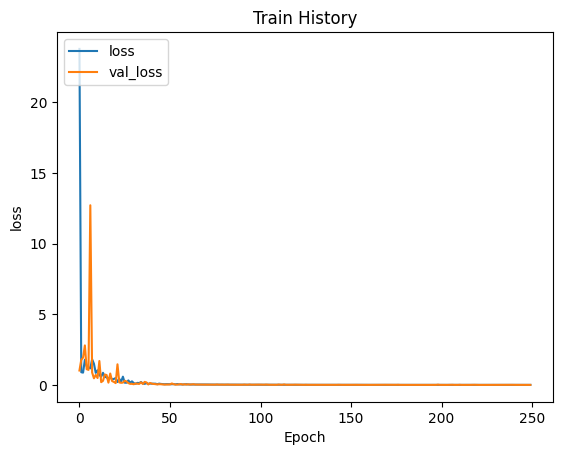

In [45]:
#看優化的過程
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#####隱藏層6.神經元256次數250

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])
# 模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# 訓練模型
train_history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)
# 在測試集上進行預測
y_pred_neural = model.predict(X_test)

# 評估模型性能
r2_neural = r2_score(y_test, y_pred_neural)
print('R² Score:', r2_neural)

Epoch 1/250
328/328 [==============================] - 6s 6ms/step - loss: 9.3013 - mean_squared_error: 9.3013 - val_loss: 0.1889 - val_mean_squared_error: 0.1889
Epoch 2/250
328/328 [==============================] - 1s 3ms/step - loss: 0.1628 - mean_squared_error: 0.1628 - val_loss: 0.1651 - val_mean_squared_error: 0.1651
Epoch 3/250
328/328 [==============================] - 1s 3ms/step - loss: 0.1297 - mean_squared_error: 0.1297 - val_loss: 0.1119 - val_mean_squared_error: 0.1119
Epoch 4/250
328/328 [==============================] - 1s 4ms/step - loss: 0.1404 - mean_squared_error: 0.1404 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 5/250
328/328 [==============================] - 1s 4ms/step - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 6/250
328/328 [==============================] - 1s 3ms/step - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.0908 - val_mean_squared_error: 0.0908
Epoch 7/250
328/328 [=

######優化過程

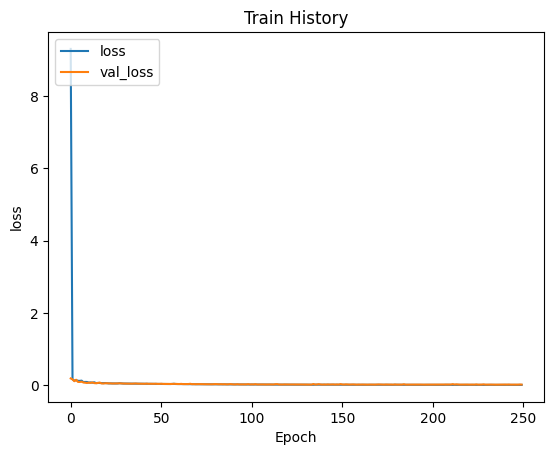

In [47]:
#看優化的過程
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#篩選過的dataframe

In [23]:
brand_count= df['Brand'].value_counts() #各品牌的銷售數量
total_brand= df['Brand'].nunique() #共有多少品牌
year_count= df['Year'].value_counts() #各年份銷售量

df_year_count = year_count.reset_index()
df_year_count.columns = ['Year','Count']

top_ten = brand_count.head(10).reset_index() #前10大銷售量品牌與銷售數,存成新的dataframe
top_ten.columns= ['Brand','Count'] #轉換成新的dataframe['Brand' & 'Count']

filter_year_20 = df[df['Year'] >2009]#把年份縮短到近20年
fueltype_year_20 = filter_year_20['FuelType'].value_counts() # 發現一個Fueltype為'-'
df_fueltype_year_20 = filter_year_20[filter_year_20['FuelType'] != '-']  # 先將'-'移除

#近20年總銷售額最高的前10大車廠的FuelType分類
df_filter_year_20 = df[df['Year'] >2002] #近20年
df_filter_year_20['FuelType'] = np.where(df_filter_year_20['FuelType'].isin(['Hybrid', 'Unleaded','Electric']), df_filter_year_20['FuelType'], 'Other')#fueltype分類
df_fueltype_filter = df_filter_year_20.query("FuelType != 'Other'") #other太多了，只看油電，無鉛，純電
top_10_sales = df_filter_year_20.groupby('Brand')['Price'].sum().nlargest(10).index #看前10大銷售品牌的
df_top_10_year_sales = df_fueltype_filter[df_fueltype_filter['Brand'].isin(top_10_sales)]


<ipython-input-23-23121e3481e4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_year_20['FuelType'] = np.where(df_filter_year_20['FuelType'].isin(['Hybrid', 'Unleaded','Electric']), df_filter_year_20['FuelType'], 'Other')#fueltype分類


In [24]:
df_top_10_year_sales

Brand  Year      Model         Car/Suv  \
5             Toyota  2004     Estima  ON FOUR WHEELS   
10            Toyota  2009      HiAce         Carbarn   
11            Toyota  2018      HiAce      Commercial   
19              Ford  2014     Fiesta       Hatchback   
20        Mitsubishi  2012  Outlander             SUV   
...              ...   ...        ...             ...   
16726         Toyota  2011     Estima      Topcar Rez   
16727        Hyundai  2015        I30           Wagon   
16728         Nissan  2021    Qashqai             SUV   
16729         Toyota  2014    Alphard        SYC Cars   
16733  Mercedes-Benz  2021       C200           Sedan   

                                        Title UsedOrNew Transmission  \
5                2004 Toyota Estima T EDITION      USED    Automatic   
10               2009 Toyota HiAce (No Badge)      USED    Automatic   
11                      2018 Toyota HiAce LWB      USED    Automatic   
19                     2014 Ford Fiesta Sport      USED    Automatic   
20         2012 Mitsubishi Outlander LS (4X4)      USED    Automatic   
...                                       ...       ...          ...   
16726                      2011 Toyota Estima      USED    Automatic   
16727  2015 Hyundai I30 Tourer Active 1.6 GDI      USED    Automatic   
16728                  2021 Nissan Qashqai TI      USED    Automatic   
16729                     2014 Toyota Alphard      USED    Automatic   
16733                 2021 Mercedes-Benz C200      USED    Automatic   

             Engine DriveType  FuelType FuelConsumption Kilometres  \
5                 -     Other  Unleaded               -     160230   
10                -     Other  Unleaded               -     148190   
11     4 cyl, 2.7 L      Rear  Unleaded  9.8 L / 100 km      16324   
19       3 cyl, 1 L     Front  Unleaded  5.4 L / 100 km      76289   
20     4 cyl, 2.4 L       AWD  Unleaded  7.5 L / 100 km     219681   
...             ...       ...       ...             ...        ...   
16726             -     Front  Unleaded               -      97000   
16727  4 cyl, 1.6 L     Front  Unleaded  6.9 L / 100 km      54359   
16728    4 cyl, 2 L     Front  Unleaded  6.9 L / 100 km      32977   
16729             -     Front  Unleaded               -      66000   
16733    4 cyl, 2 L      Rear  Unleaded    7 L / 100 km      31852   

                ColourExtInt                Location CylindersinEngine  \
5                   Grey / -        Saint Marys, NSW                 -   
10                 White / -           Lidcombe, NSW                 -   
11              White / Grey           Lidcombe, NSW             4 cyl   
19             White / Black         Cabramatta, NSW             3 cyl   
20             Black / Black          Blacktown, NSW             4 cyl   
...                      ...                     ...               ...   
16726             Silver / -  Holland Park West, QLD                 -   
16727  Silver / Black  Cloth     Oakleigh South, VIC             4 cyl   
16728              White / -            Rocklea, QLD             4 cyl   
16729               Grey / -            Rocklea, QLD                 -   
16733               Gold / -             Yatala, QLD             4 cyl   

         BodyType     Doors     Seats    Price  
5      Commercial   virtual   virtual   9990.0  
10     Commercial   virtual   virtual  42500.0  
11     Commercial   4 Doors   2 Seats  41999.0  
19      Hatchback   5 Doors   5 Seats  12400.0  
20            SUV   4 Doors   7 Seats  13999.0  
...           ...       ...       ...      ...  
16726       Wagon   7 Seats   virtual  21989.0  
16727       Wagon   4 Doors   5 Seats  21450.0  
16728         SUV   4 Doors   5 Seats  36770.0  
16729  Commercial   7 Seats   virtual  29500.0  
16733       Sedan   4 Doors   5 Seats  65888.0  

[4682 rows x 19 columns]

In [25]:
df_top_10_year_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4682 entries, 5 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              4682 non-null   object 
 1   Year               4682 non-null   int64  
 2   Model              4682 non-null   object 
 3   Car/Suv            4682 non-null   object 
 4   Title              4682 non-null   object 
 5   UsedOrNew          4682 non-null   object 
 6   Transmission       4682 non-null   object 
 7   Engine             4682 non-null   object 
 8   DriveType          4682 non-null   object 
 9   FuelType           4682 non-null   object 
 10  FuelConsumption    4682 non-null   object 
 11  Kilometres         4682 non-null   object 
 12  ColourExtInt       4682 non-null   object 
 13  Location           4682 non-null   object 
 14  CylindersinEngine  4682 non-null   object 
 15  BodyType           4682 non-null   object 
 16  Doors              4682 non-

    Price  Brand  Year  Model  UsedOrNew  Car/Suv  Title  Transmission  \
5     117      8  2004     69          2      128     67             1   
10   1036      8  2009     87          2       39    368             1   
11   1027      8  2018     87          2       48   1394             1   
19    172      2  2014     75          2       77    811             1   
20    225      6  2012    121          2      155    635             1   

    Engine  DriveType  FuelType  FuelConsumption  Kilometres  ColourExtInt  \
5        0          3         2                0        1088            88   
10       0          3         2                0         910           193   
11      15          4         2              112        1142           246   
19       2          2         2               68        3812           216   
20      12          1         2               89        1794            14   

    CylindersinEngine  BodyType  
5                   0         0  
10                

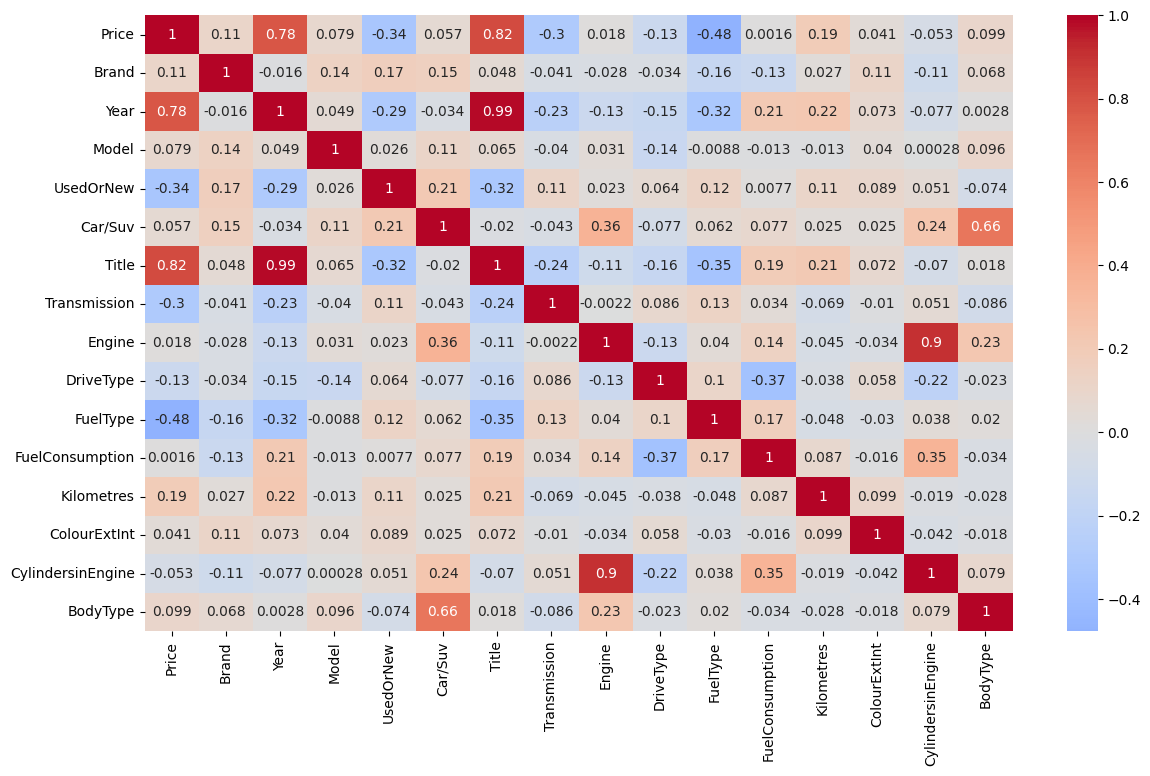

In [26]:
df_10_year = df_top_10_year_sales.loc[:, ['Price', 'Brand', 'Year', 'Model', 'UsedOrNew', 'Car/Suv', 'Title', 'Transmission', 'Engine', 'DriveType' , 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'CylindersinEngine', 'BodyType']]

df_10_year['Price'] = lb.fit_transform(df_10_year['Price'])
df_10_year['Brand'] = lb.fit_transform(df_10_year['Brand'])
df_10_year['Model'] = lb.fit_transform(df_10_year['Model'])
df_10_year['Car/Suv'] = lb.fit_transform(df_10_year['Car/Suv'])
df_10_year['Title'] = lb.fit_transform(df_10_year['Title'])
df_10_year['UsedOrNew'] = lb.fit_transform(df_10_year['UsedOrNew'])
df_10_year['Transmission'] = lb.fit_transform(df_10_year['Transmission'])
df_10_year['Engine'] = lb.fit_transform(df_10_year['Engine'])
df_10_year['DriveType'] = lb.fit_transform(df_10_year['DriveType'])
df_10_year['FuelType'] = lb.fit_transform(df_10_year['FuelType'])
df_10_year['FuelConsumption'] = lb.fit_transform(df_10_year['FuelConsumption'])
df_10_year['Kilometres'] = lb.fit_transform(df_10_year['Kilometres'])
df_10_year['ColourExtInt'] = lb.fit_transform(df_10_year['ColourExtInt'])
df_10_year['CylindersinEngine'] = lb.fit_transform(df_10_year['CylindersinEngine'])
df_10_year['BodyType'] = lb.fit_transform(df_10_year['BodyType'])



print(df_10_year.head())

corr_matrix=df_10_year.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0,cmap = 'coolwarm', annot=True)
plt.show()


#散點圖


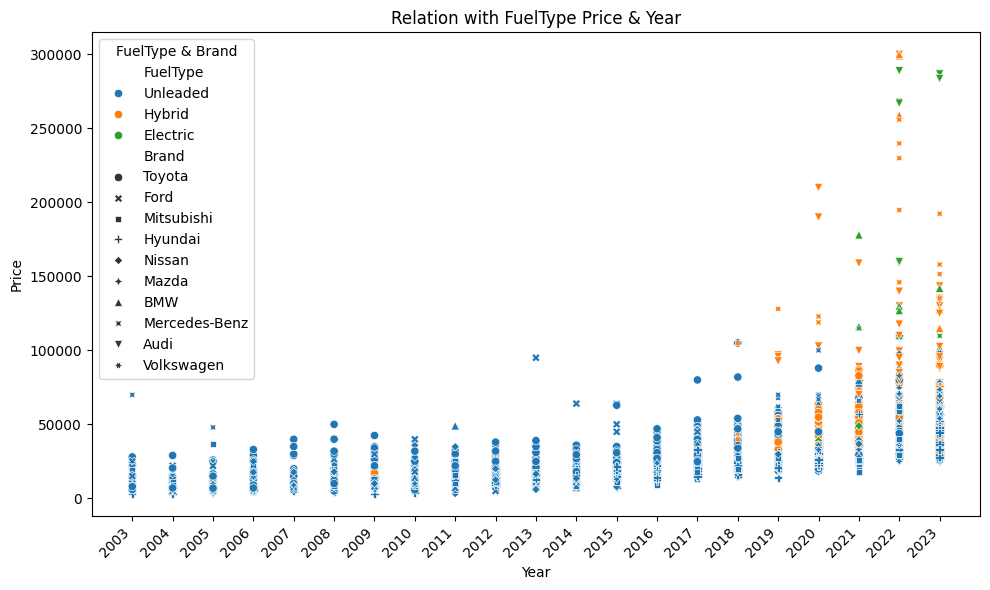

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', hue='FuelType', style='Brand', data=df_top_10_year_sales) #散點圖
plt.title('Relation with FuelType Price & Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(np.arange(min(df_top_10_year_sales['Year']), max(df_top_10_year_sales['Year'])+1, 1.0),rotation=45, ha='right')
plt.legend(title='FuelType & Brand')
plt.tight_layout()
plt.show()

#盒鬚圖

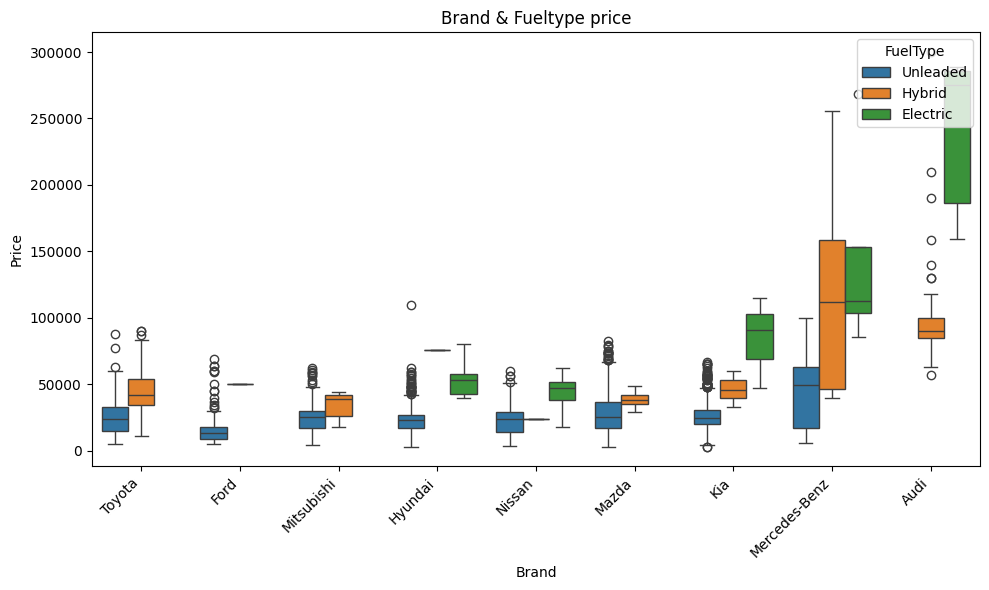

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', hue='FuelType', data=df_top_10_year_sales) #合鬚圖
plt.title('Brand & Fueltype price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='FuelType', loc='upper right')
plt.tight_layout()
plt.show()

#
 長條圖

<ipython-input-14-94e0eb36760d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price', data=df_top_10_year_sales, palette='viridis') #長條圖


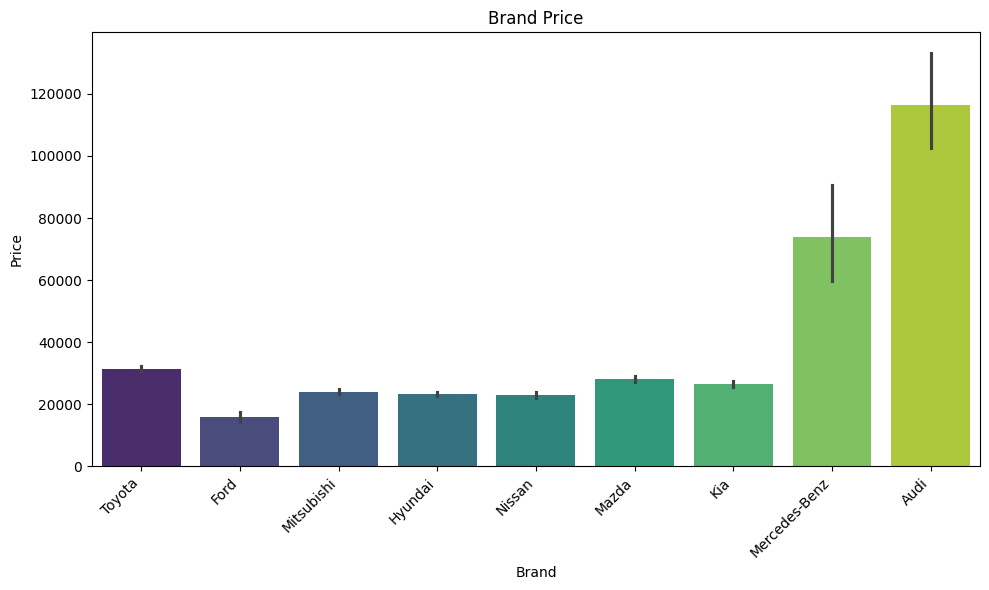

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Price', data=df_top_10_year_sales, palette='viridis') #長條圖
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#計數長條圖

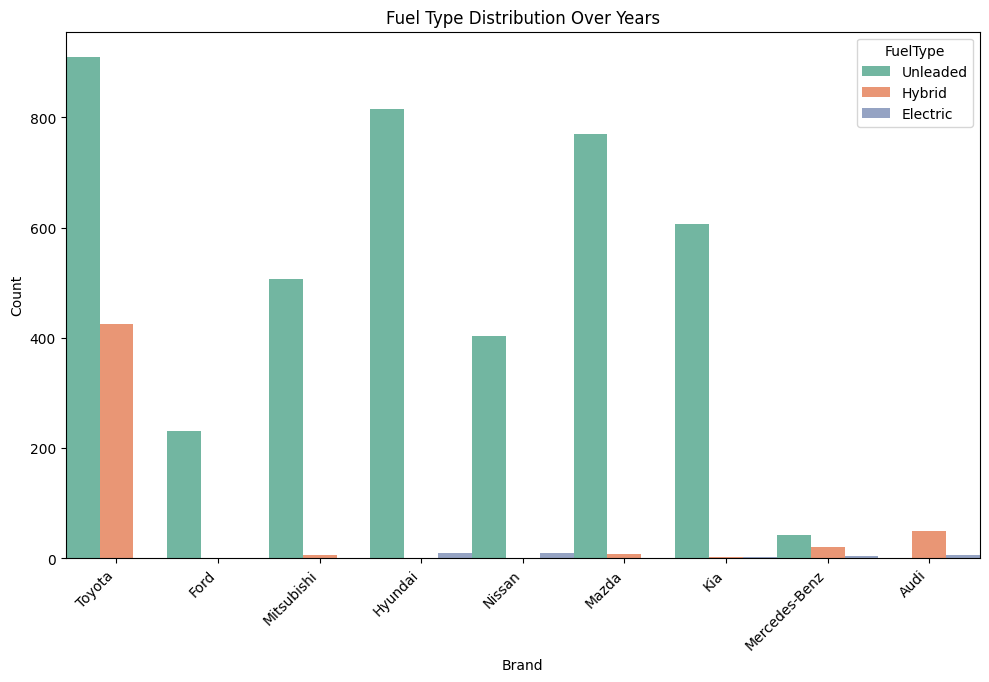

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', hue='FuelType', data=df_top_10_year_sales, palette='Set2', width=1) #計數長條圖
plt.tight_layout()
plt.title('Fuel Type Distribution Over Years')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#
 ndf 轉換為數字的df,移除缺失值太多欄位

In [ ]:
## 把所有資料轉成數字

In [ ]:
nb = df_top_10_year_sales['Brand'].unique()
print(nb)
# df['Brand'] = lb.fit_transform(df['Brand'])
# nbq = df['Brand'].unique()
# print(nbq)

# original_data = lb.inverse_transform(df['Brand'])

['Toyota' 'Ford' 'Mitsubishi' 'Hyundai' 'Nissan' 'Mazda' 'Kia'
 'Mercedes-Benz' 'Audi']


In [ ]:
df_10_year.describe()

Price        Brand         Year        Model    UsedOrNew  \
count  4832.000000  4832.000000  4832.000000  4832.000000  4832.000000   
mean    614.427152     4.930257  2016.456747    64.445985     1.947227   
std     362.418632     2.488620     4.666989    41.975404     0.296094   
min       0.000000     0.000000  2003.000000     0.000000     0.000000   
25%     316.000000     3.000000  2014.000000    29.000000     2.000000   
50%     595.000000     4.000000  2018.000000    67.000000     2.000000   
75%     880.250000     8.000000  2020.000000   103.000000     2.000000   
max    1431.000000     8.000000  2023.000000   135.000000     2.000000   

           Car/Suv        Title  Transmission       Engine    DriveType  \
count  4832.000000  4832.000000   4832.000000  4832.000000  4832.000000   
mean     43.376449  1113.680257      1.080919    11.827401     1.847475   
std      13.798819   526.455538      0.278744     5.101780     0.601968   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%      24.000000   712.000000      1.000000    10.000000     2.000000   
50%      51.000000  1192.000000      1.000000    10.000000     2.000000   
75%      51.000000  1511.000000      1.000000    13.000000     2.000000   
max      65.000000  2003.000000      2.000000    31.000000     3.000000   

          FuelType  FuelConsumption   Kilometres  ColourExtInt  \
count  4832.000000      4832.000000  4832.000000   4832.000000   
mean      1.880174        75.082988  2312.783940    134.859685   
std       0.344583        26.123870  1344.517783     73.161839   
min       0.000000         0.000000     0.000000      0.000000   
25%       2.000000        71.000000  1152.750000     85.000000   
50%       2.000000        83.000000  2311.500000    156.000000   
75%       2.000000        91.000000  3478.250000    192.000000   
max       2.000000       112.000000  4646.000000    264.000000   

       CylindersinEngine     BodyType  
count        4832.000000  4832.000000  
mean            2.224131     5.432119  
std             0.715367     1.746732  
min             0.000000     0.000000  
25%             2.000000     3.000000  
50%             2.000000     6.000000  
75%             2.000000     6.000000  
max             5.000000     9.000000

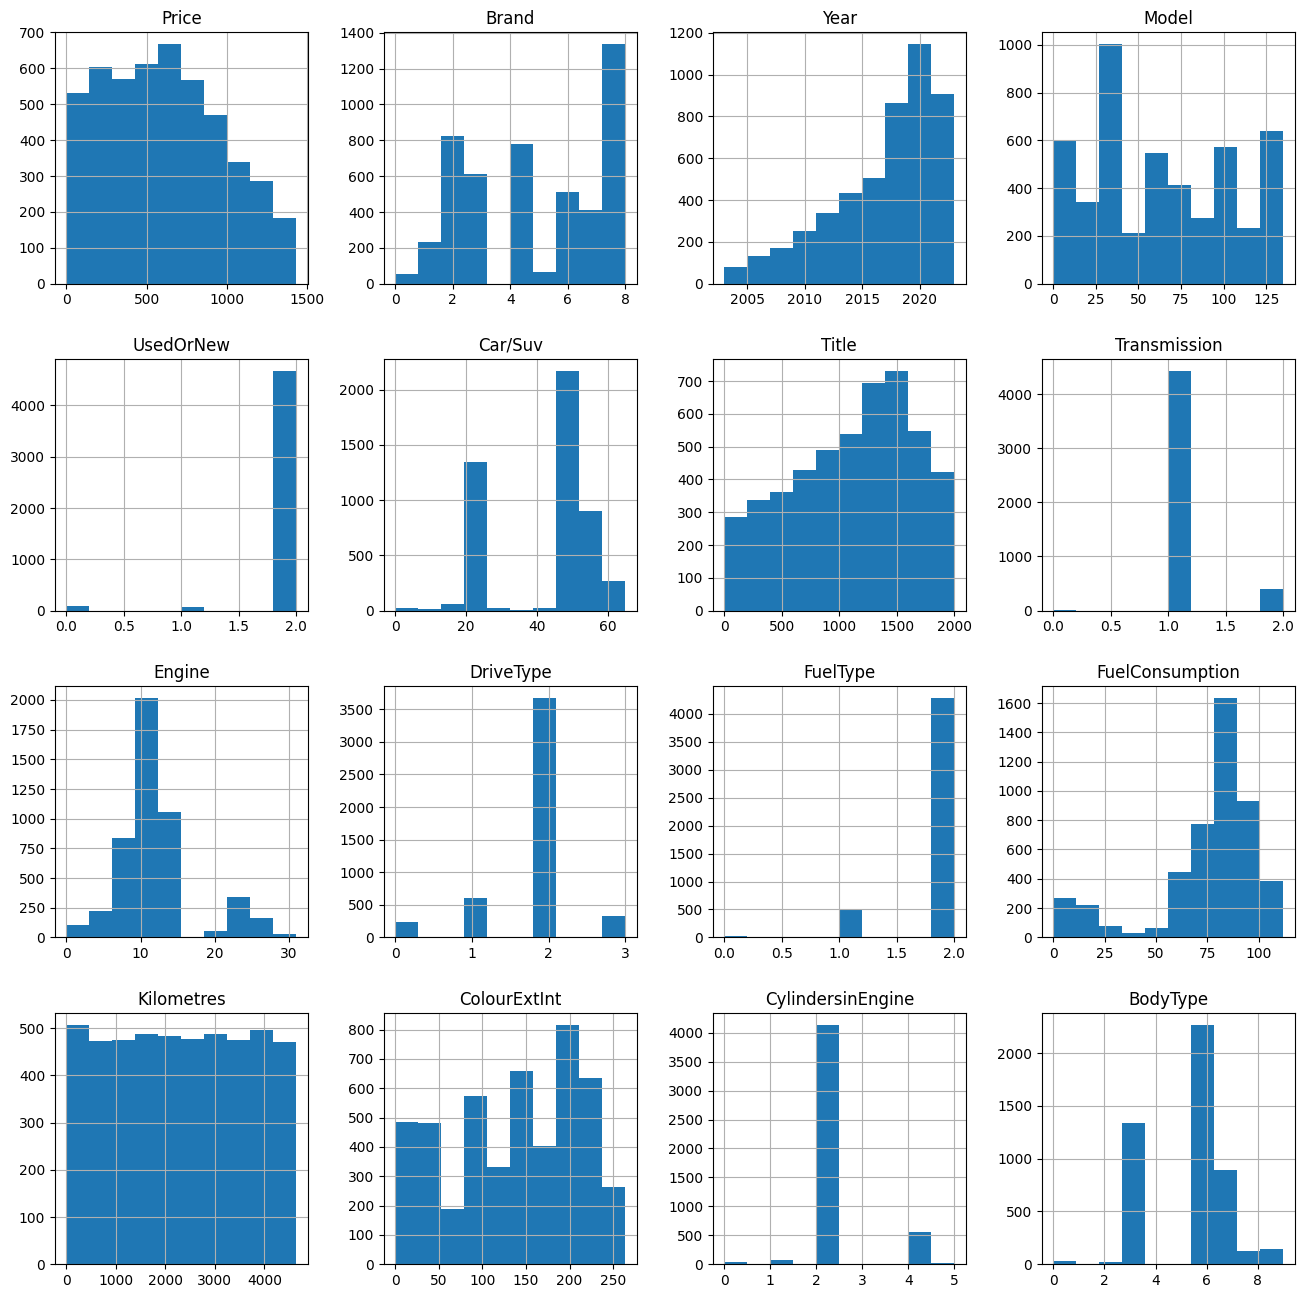

In [ ]:
df_10_year.hist(bins = 10 , figsize=(16,16))
plt.show()

#特定欄位相關資訊

In [ ]:
df_10_year[['Year','Brand','Price']].value_counts() #計算出現次數

Year  Brand  Price
2020  3      606      16
2019  2      545      16
2020  2      672      10
             508      10
2019  2      672       9
                      ..
2015  6      349       1
             380       1
             381       1
             408       1
2023  8      1385      1
Name: count, Length: 3742, dtype: int64

In [ ]:
len(df["Year"].unique())

39

<ipython-input-22-20571735bfaa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Year',y= 'Price' ,palette='viridis', data =df_10_year)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018'),
  Text(16, 0, '2019'),
  Text(17, 0, '2020'),
  Text(18, 0, '2021'),
  Text(19, 0, '2022'),
  Text(20, 0, '2023')])

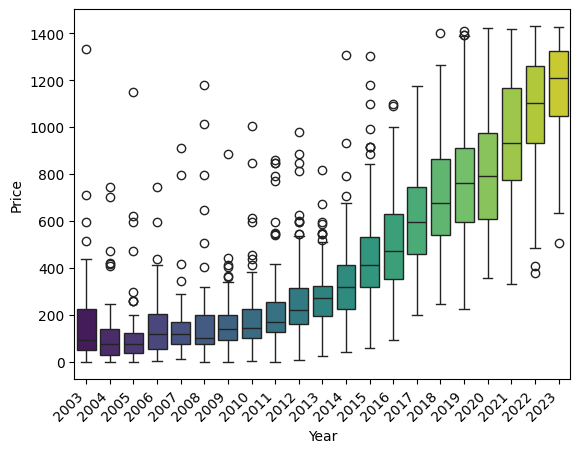

In [ ]:
sns.boxplot(x= 'Year',y= 'Price' ,palette='viridis', data =df_10_year)
plt.xticks(rotation=45, ha='right')

In [ ]:
df_10_year['Brand'].unique()

array([8, 1, 6, 2, 7, 4, 3, 5, 0])

In [ ]:
# original_data = lb.inverse_transform(ndf['Brand'])  轉換失敗的話要儲存成dic的型態

<ipython-input-25-59c36c227212>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand',palette='viridis', data=df_10_year)


<Axes: xlabel='Brand', ylabel='count'>

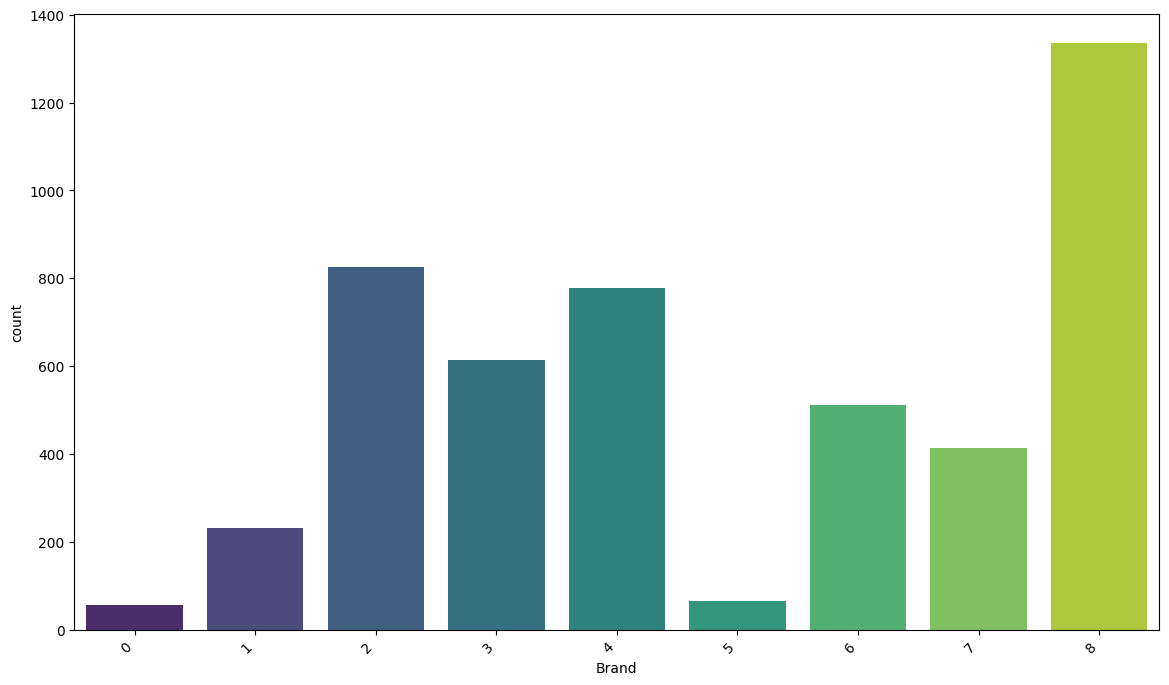

In [ ]:
plt.figure(1, figsize=(14,8))
plt.xticks(rotation=45, ha='right')
sns.countplot(x='Brand',palette='viridis', data=df_10_year)

In [ ]:
df_10_year.loc[df_10_year['Brand']==61]

Empty DataFrame
Columns: [Price, Brand, Year, Model, UsedOrNew, Car/Suv, Title, Transmission, Engine, DriveType, FuelType, FuelConsumption, Kilometres, ColourExtInt, CylindersinEngine, BodyType]
Index: []

In [ ]:
df_10_year.loc[df['Brand']=='MG']

Empty DataFrame
Columns: [Price, Brand, Year, Model, UsedOrNew, Car/Suv, Title, Transmission, Engine, DriveType, FuelType, FuelConsumption, Kilometres, ColourExtInt, CylindersinEngine, BodyType]
Index: []

In [ ]:
corr =df_10_year.corr()
corr.columns

Index(['Price', 'Brand', 'Year', 'Model', 'UsedOrNew', 'Car/Suv', 'Title',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'CylindersinEngine', 'BodyType'],
      dtype='object')

#與廠牌相關度分析

In [ ]:
corr['Brand'].sort_values(ascending = False)

Brand                1.000000
Car/Suv              0.180286
Price                0.147894
UsedOrNew            0.138551
BodyType             0.106220
ColourExtInt         0.079361
Title                0.068711
Model                0.048240
Engine               0.047897
Kilometres           0.014985
Year                -0.008930
Transmission        -0.016630
CylindersinEngine   -0.060632
FuelConsumption     -0.074345
DriveType           -0.124690
FuelType            -0.235201
Name: Brand, dtype: float64

<Axes: xlabel='Brand', ylabel='DriveType'>

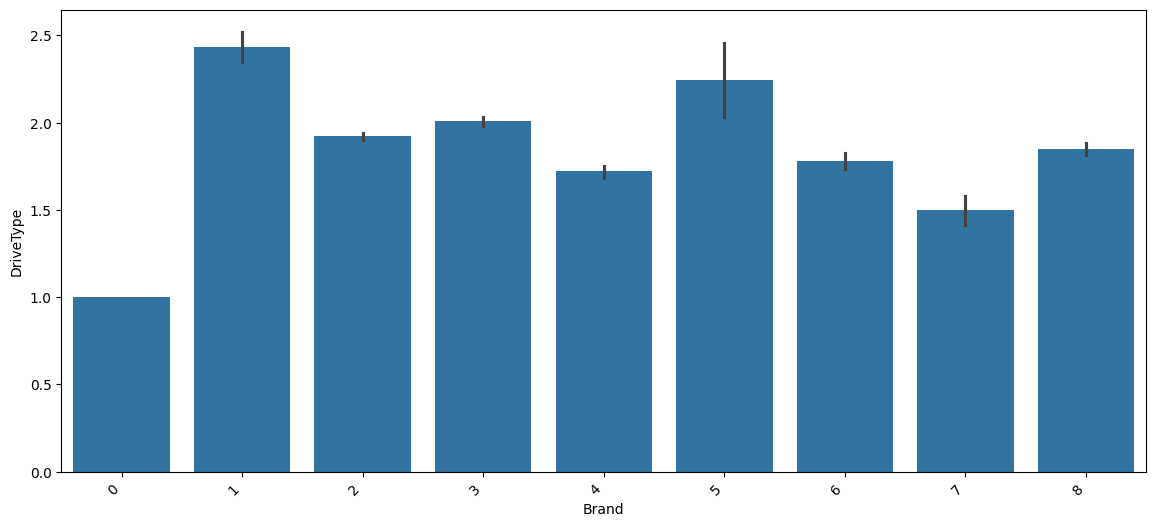

In [ ]:
fig  = plt.figure(figsize=(14,6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Brand', y = 'DriveType',  data = df_10_year)

In [ ]:
# sns.kdeplot(ndf['Title'][ndf['Brand']==20])

# for i in np.sort(df['Brand'].unique()) :
#   sns.kdeplot(ndf['Title'][ndf['Brand']==i], \
#       label = f'class={i:s}')

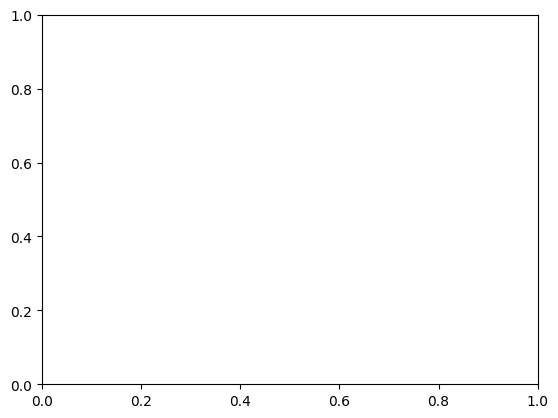

In [ ]:
sns.kdeplot(df_10_year['Title'][df_10_year['Brand']==20])

for i in np.sort(df['Brand'].unique()) :
  sns.kdeplot(df_10_year['Title'][df_10_year['Brand']==i], \
      label = f'class={i:s}')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

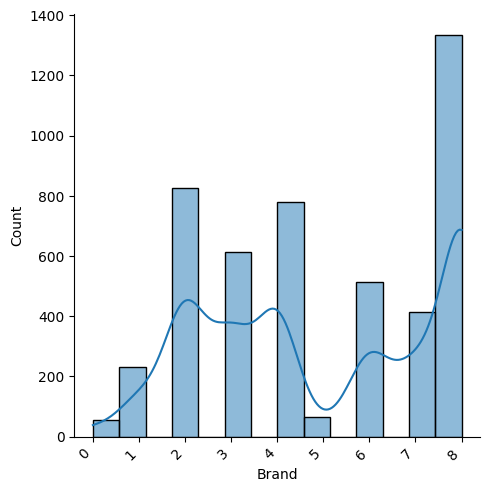

In [ ]:
sns.displot(df_10_year['Brand'],kde =True)
plt.xticks(rotation=45, ha='right')

<ipython-input-34-20effcdc712e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_10_year['Title'][df_10_year['Brand']==62], \
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: xlabel='Title'>

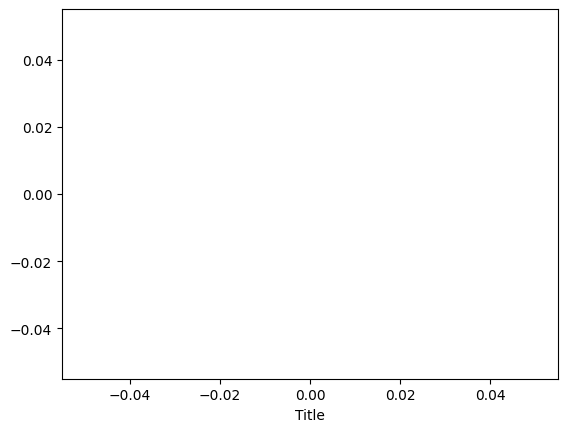

In [ ]:
sns.distplot(df_10_year['Title'][df_10_year['Brand']==62], \
    label = f'class={i:s}')


In [ ]:
df_10_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 11 to 16733
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Price              4832 non-null   int64
 1   Brand              4832 non-null   int64
 2   Year               4832 non-null   int64
 3   Model              4832 non-null   int64
 4   UsedOrNew          4832 non-null   int64
 5   Car/Suv            4832 non-null   int64
 6   Title              4832 non-null   int64
 7   Transmission       4832 non-null   int64
 8   Engine             4832 non-null   int64
 9   DriveType          4832 non-null   int64
 10  FuelType           4832 non-null   int64
 11  FuelConsumption    4832 non-null   int64
 12  Kilometres         4832 non-null   int64
 13  ColourExtInt       4832 non-null   int64
 14  CylindersinEngine  4832 non-null   int64
 15  BodyType           4832 non-null   int64
dtypes: int64(16)
memory usage: 641.8 KB


In [ ]:
df_10_year.head(10)

Price  Brand  Year  Model  UsedOrNew  Car/Suv  Title  Transmission  \
11   1046      8  2018     63          2       13   1290             1   
19    174      1  2014     53          2       24    705             1   
20    226      6  2012     90          2       51    557             1   
21    172      1  2013     53          2       24    601             1   
25    260      6  2018     83          2       24   1251             1   
26     81      8  2005     29          2       52     94             1   
28    197      2  2011     69          2       52    427             1   
30    464      7  2018    102          2       51   1262             1   
33    534      2  2015    130          2       51    827             1   
34    323      1  2016     54          2       24    914             1   

    Engine  DriveType  FuelType  FuelConsumption  Kilometres  ColourExtInt  \
11      15          3         2              111        1110           244   
19       1          2         2               67        4006           216   
20      12          1         2               88        1771            12   
21       8          2         2               74        4596            38   
25       2          2         2               61        2493             8   
26      12          2         2              111         321           179   
28      12          2         2               92        1443           163   
30      10          2         2               82         295            34   
33      10          2         2               92        4492            85   
34       7          2         2               75        4508           216   

    CylindersinEngine  BodyType  
11                  2         0  
19                  1         3  
20                  2         6  
21                  2         3  
25                  1         3  
26                  2         7  
28                  2         7  
30                  2         6  
33                  2         6  
34                  2         3

In [ ]:
df_new = pd.get_dummies(df_10_year, columns=['Brand', 'Model', 'Car/Suv', 'Transmission', 'DriveType', 'FuelType', 'BodyType'])

In [ ]:
df_new = pd.get_dummies(df_10_year, columns=['Brand', 'Year', 'Model', 'UsedOrNew', 'Car/Suv', 'Title', 'Transmission', 'Engine', 'DriveType' , 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'CylindersinEngine', 'BodyType'])

In [ ]:
'Price', 'Brand', 'Year', 'Model', 'UsedOrNew', 'Car/Suv', 'Title', 'Transmission', 'Engine', 'DriveType' , 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'CylindersinEngine', 'BodyType'

('Price',
 'Brand',
 'Year',
 'Model',
 'UsedOrNew',
 'Car/Suv',
 'Title',
 'Transmission',
 'Engine',
 'DriveType',
 'FuelType',
 'FuelConsumption',
 'Kilometres',
 'ColourExtInt',
 'CylindersinEngine',
 'BodyType')

In [ ]:
print(df_new)

       Price  Brand_0  Brand_1  Brand_2  Brand_3  Brand_4  Brand_5  Brand_6  \
11      1046    False    False    False    False    False    False    False   
19       174    False     True    False    False    False    False    False   
20       226    False    False    False    False    False    False     True   
21       172    False     True    False    False    False    False    False   
25       260    False    False    False    False    False    False     True   
...      ...      ...      ...      ...      ...      ...      ...      ...   
16721    189    False    False     True    False    False    False    False   
16722    214    False    False     True    False    False    False    False   
16727    445    False    False     True    False    False    False    False   
16728    943    False    False    False    False    False    False    False   
16733   1314    False    False    False    False    False     True    False   

       Brand_7  Brand_8  ...  BodyType_0  BodyType_